In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

#SMOTE
from imblearn.over_sampling import SMOTE

## building pipeline for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

## hyper parameter tuning - grid search
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df_ecommerce = pd.read_csv("/content/gdrive/My Drive/MADT8101/week4/E-commerce.csv")

In [4]:
df = df_ecommerce.copy()

In [5]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [6]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df = df.dropna().reset_index(drop=True)

In [8]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [9]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
2,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
3,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
4,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
3770,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
3771,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
3772,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [10]:
df = df.drop('CustomerID', axis=1)

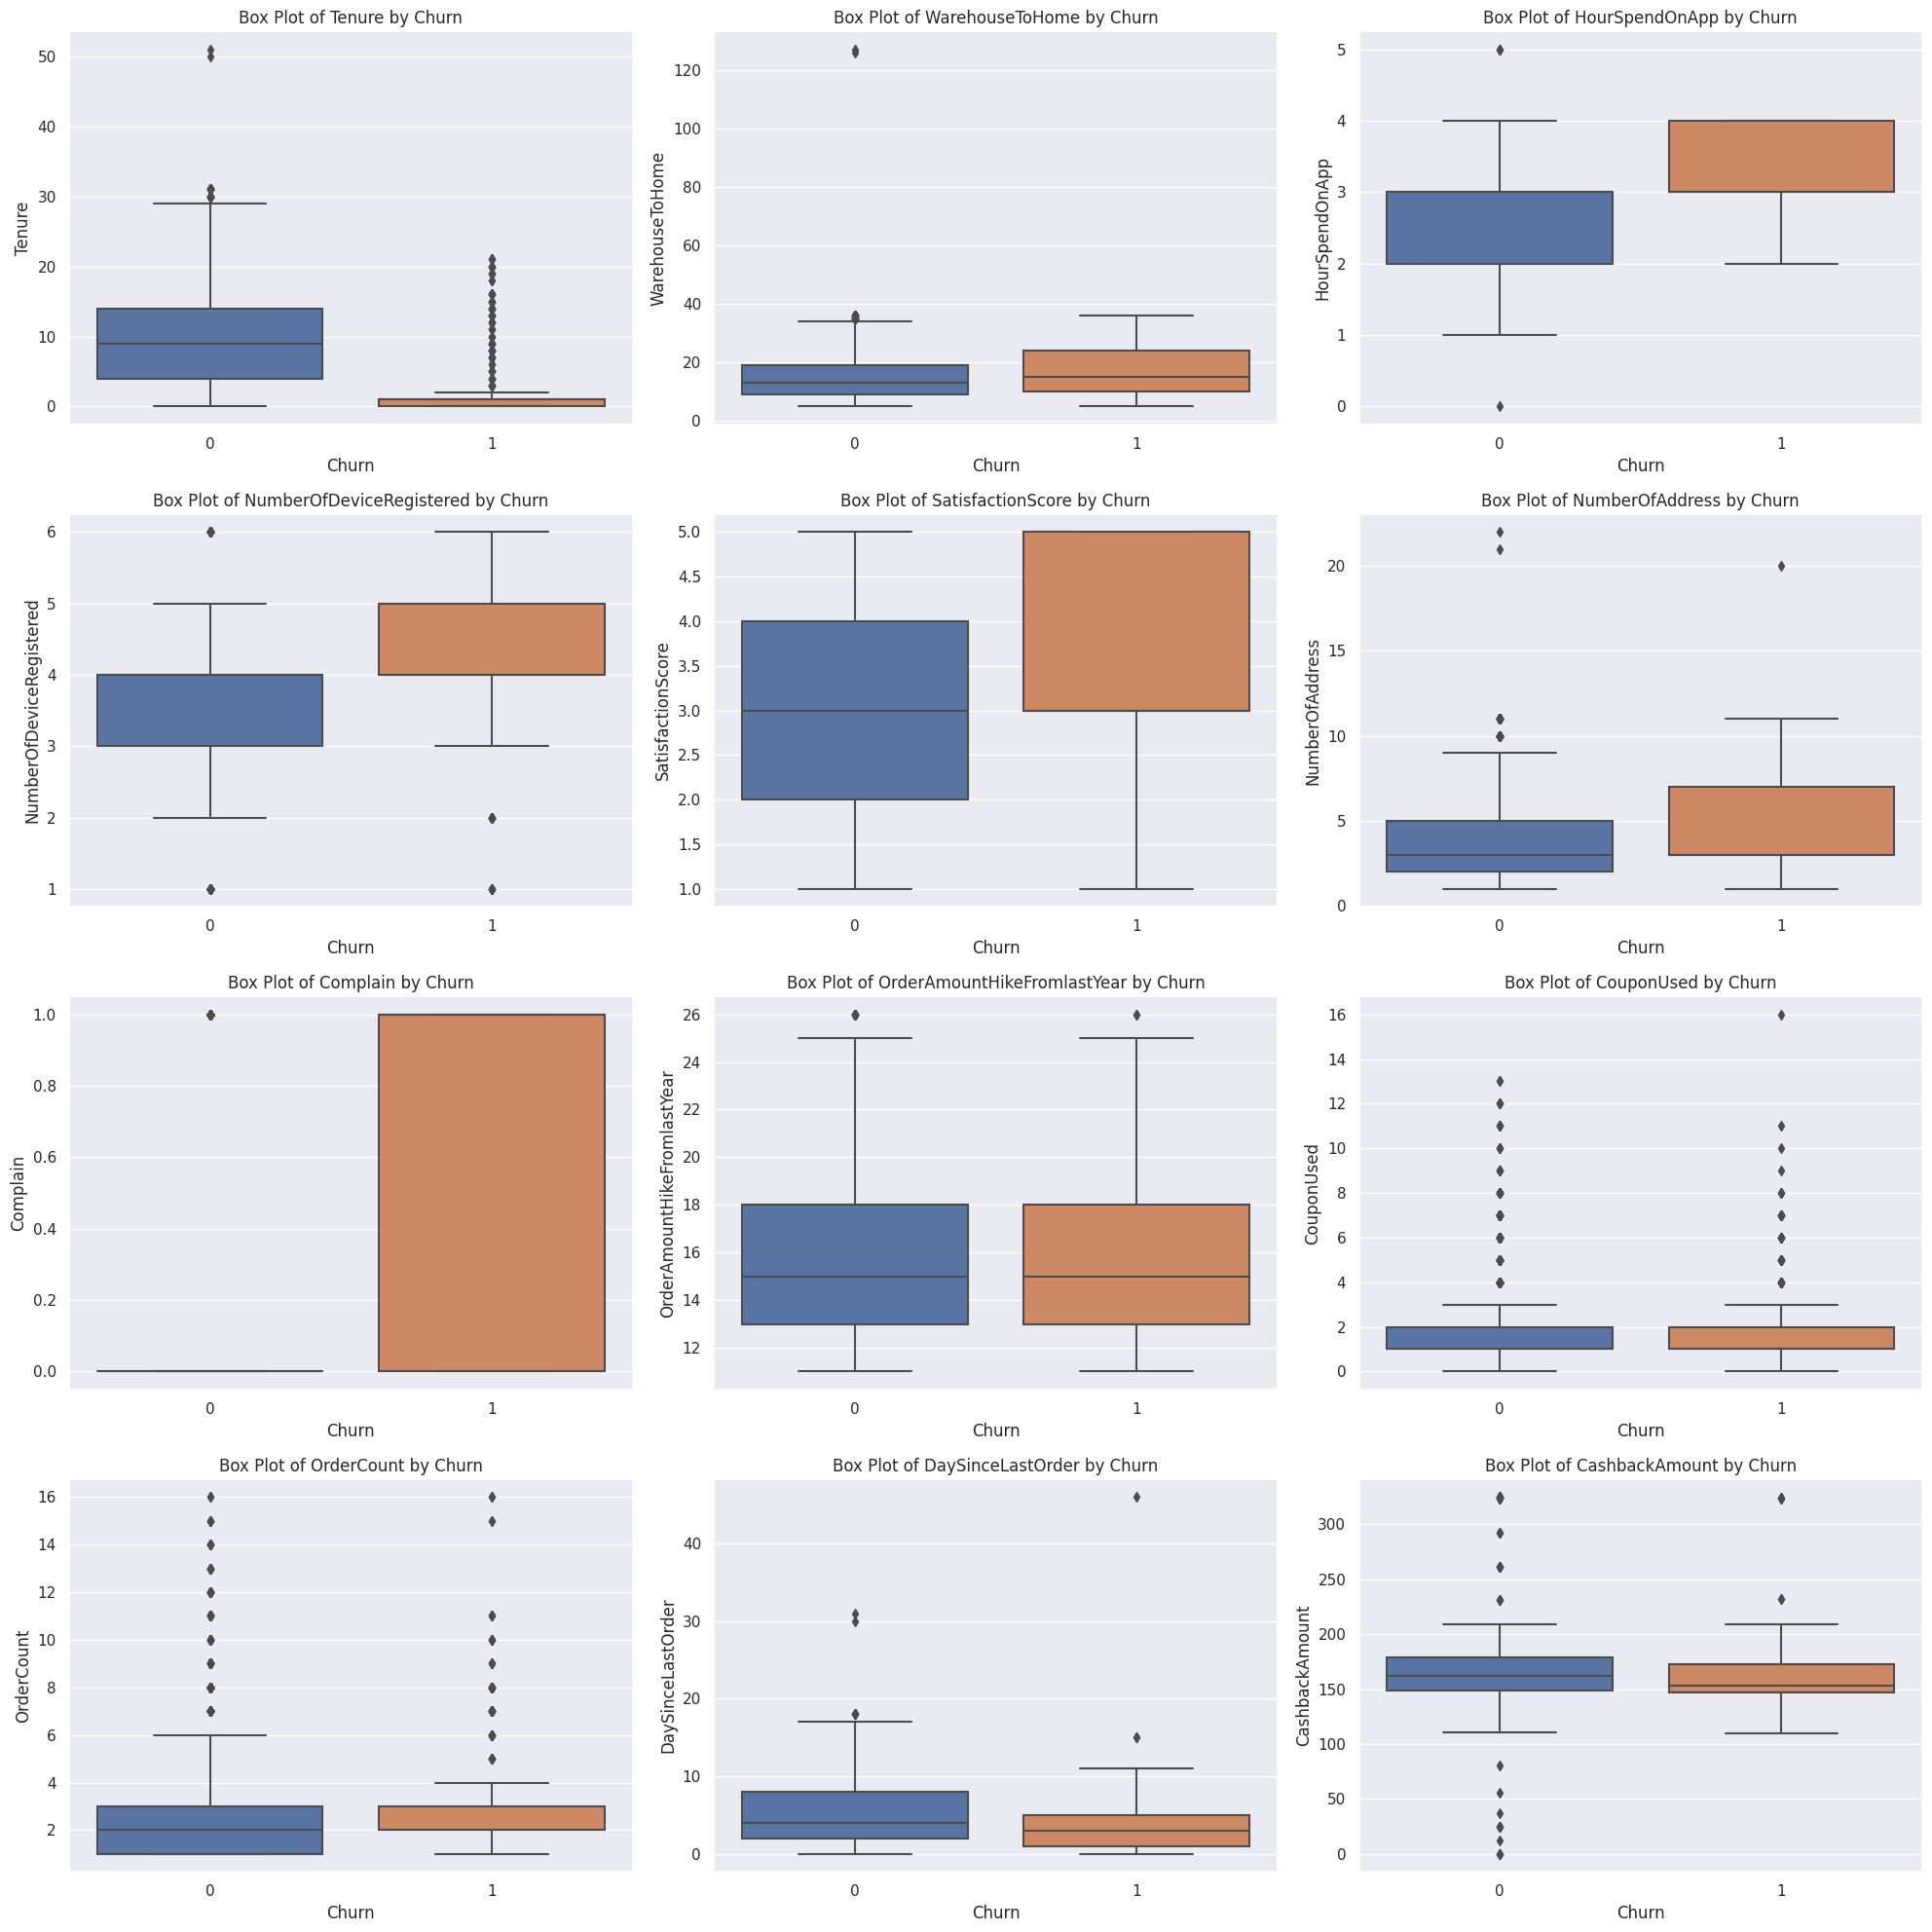

In [11]:
list_num = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
            'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
            'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
            'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

num_cols = 3
num_rows = (len(list_num) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for idx, i in enumerate(list_num):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]

    sns.boxplot(data=df, x='Churn', y=i, ax=ax)
    ax.set_title(f'Box Plot of {i} by Churn')

plt.tight_layout()
plt.show()

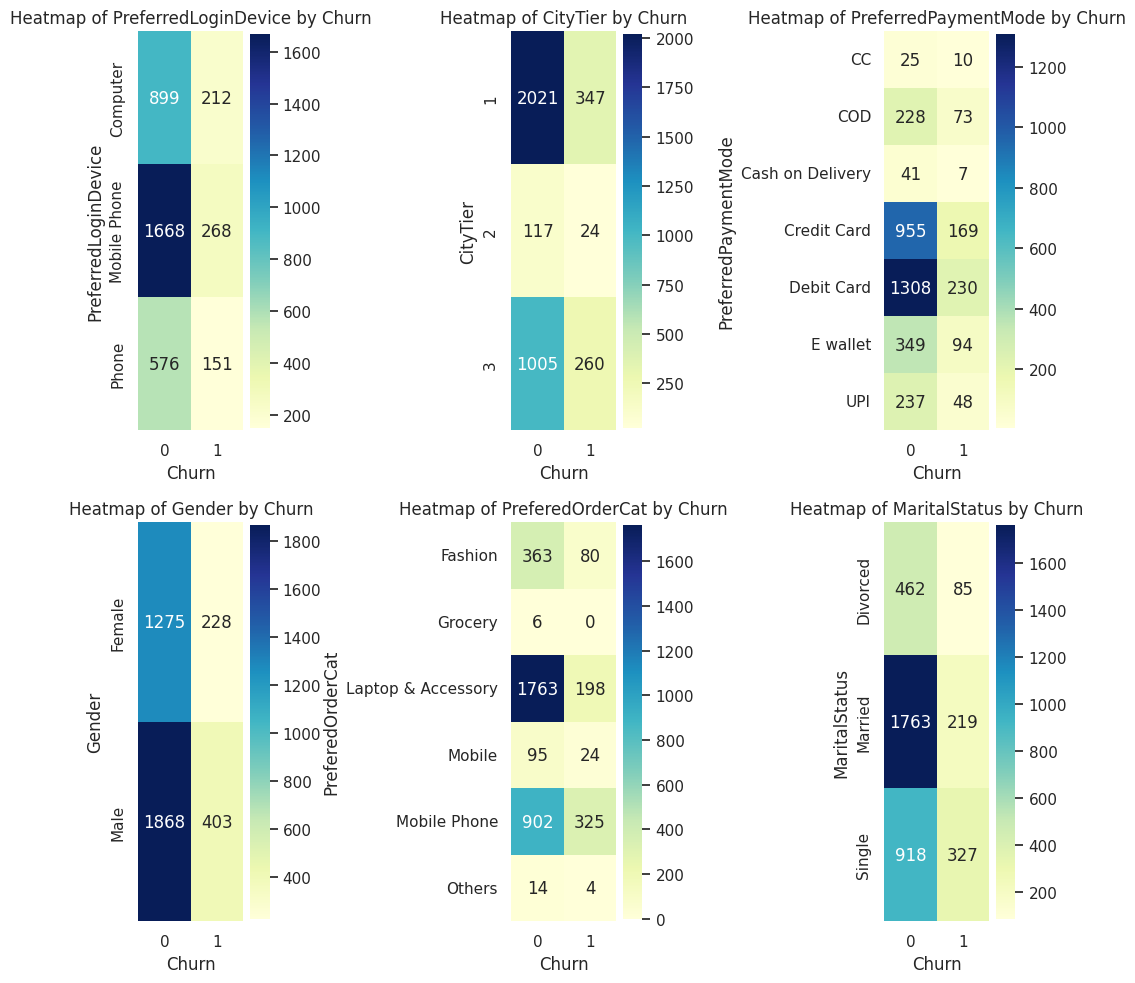

In [12]:
list_cat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
            'Gender', 'PreferedOrderCat', 'MaritalStatus']

num_cols = 3
num_rows = (len(list_cat) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for idx, i in enumerate(list_cat):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]

    df_grouped_by_target = df.groupby(by=[i, 'Churn']).agg(no_customers=('Churn','count')).reset_index().pivot(index=i, columns='Churn', values='no_customers')
    df_grouped_by_target = df_grouped_by_target.fillna(0)

    sns.heatmap(df_grouped_by_target, annot=True, fmt='.0f', ax=ax, cmap="YlGnBu")
    ax.set_title(f'Heatmap of {i} by Churn')

plt.tight_layout()
plt.show()

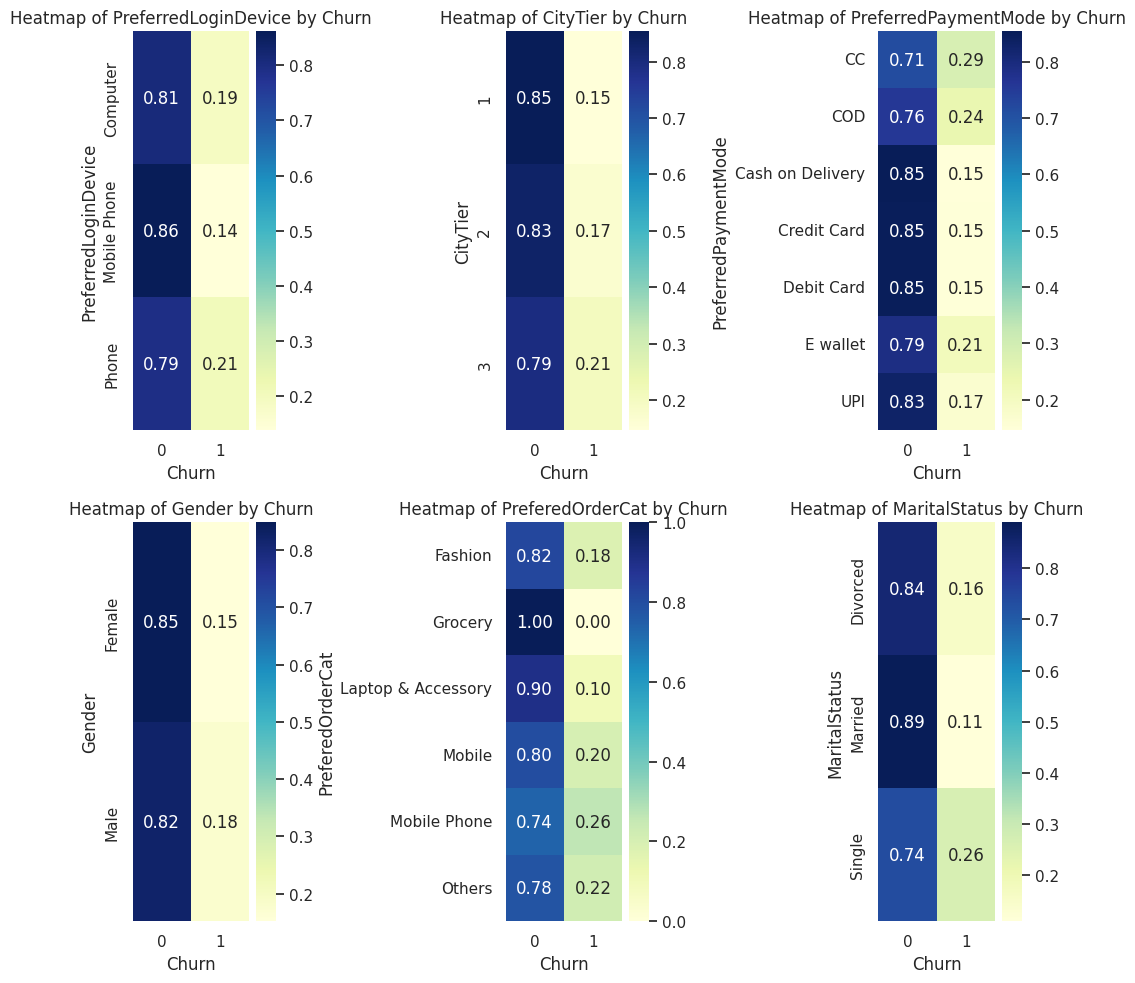

In [13]:
list_cat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
            'Gender', 'PreferedOrderCat', 'MaritalStatus']

num_cols = 3
num_rows = (len(list_cat) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for idx, i in enumerate(list_cat):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]

    df_grouped_by_target = df.groupby(by=[i, 'Churn']).size().unstack()
    df_grouped_by_target = df_grouped_by_target.fillna(0)
    df_grouped_by_target_ratio = df_grouped_by_target.div(df_grouped_by_target.sum(axis=1), axis=0)

    sns.heatmap(df_grouped_by_target_ratio, annot=True, fmt='.2f', ax=ax, cmap="YlGnBu")
    ax.set_title(f'Heatmap of {i} by Churn')

plt.tight_layout()
plt.show()

Data Preprocessing

In [14]:
cat_data = pd.DataFrame()

list_cat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
            'Gender', 'PreferedOrderCat', 'MaritalStatus']

for i in list_cat:
    cat_data = pd.concat([cat_data, pd.get_dummies(df[i], prefix=i)], axis=1)

cat_data

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3770,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3771,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3772,1,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [20]:
X = pd.concat([df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
            'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
            'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
            'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']], cat_data], axis=1)
y = df[['Churn']]

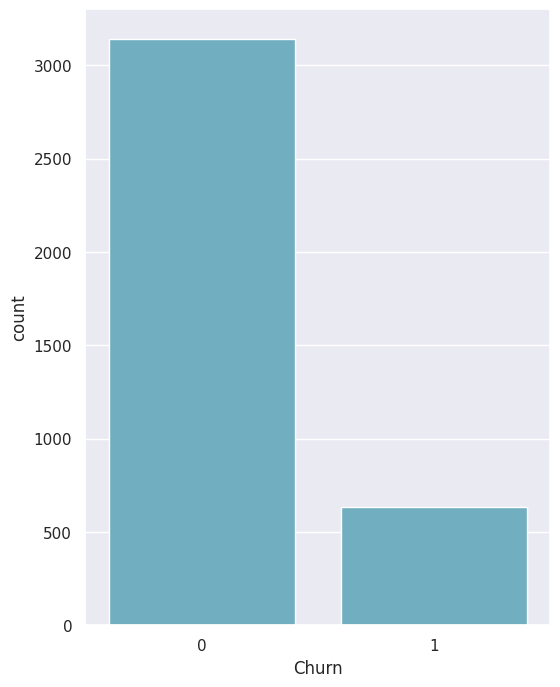

In [21]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.countplot(x='Churn', data=y, color="c")
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

SMOTE

In [31]:
sm = SMOTE(random_state=0)

sm.fit(X_train, y_train)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

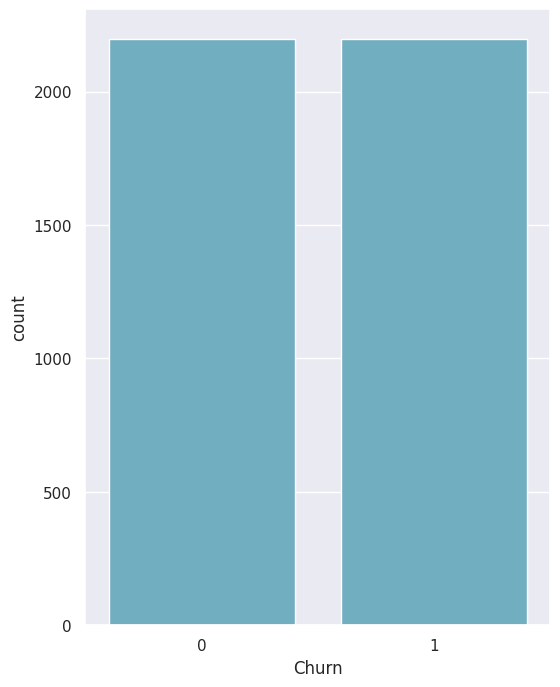

In [32]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.countplot(x='Churn', data=y_train_SMOTE, color="c")
plt.show()

In [33]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test,name):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(f'**** {name} ****')
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()
    print('---------------------------------------------------------------------------------------')

In [34]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGBoost Classifier', xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**** LogisticRegression ****
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       944
           1       0.74      0.50      0.60       189

    accuracy                           0.89      1133
   macro avg       0.82      0.73      0.77      1133
weighted avg       0.88      0.89      0.88      1133


Confusion Matrix: 



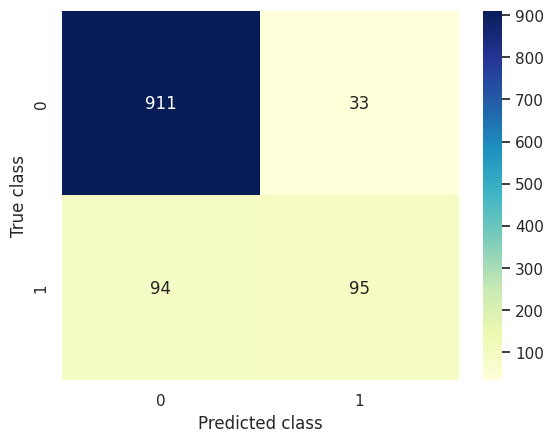

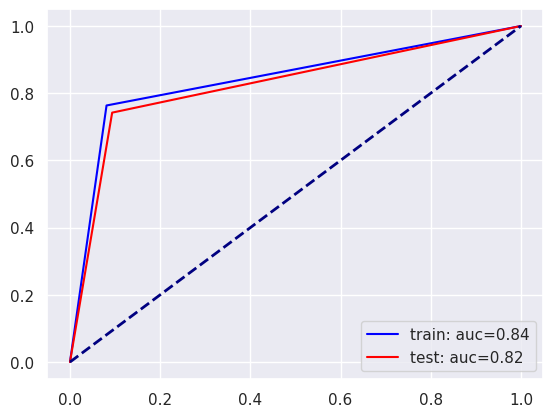

---------------------------------------------------------------------------------------
**** RandomForestClassifier ****
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       944
           1       0.96      0.81      0.88       189

    accuracy                           0.96      1133
   macro avg       0.96      0.90      0.93      1133
weighted avg       0.96      0.96      0.96      1133


Confusion Matrix: 



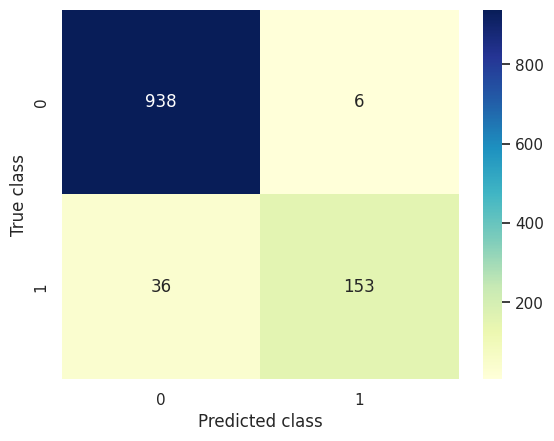

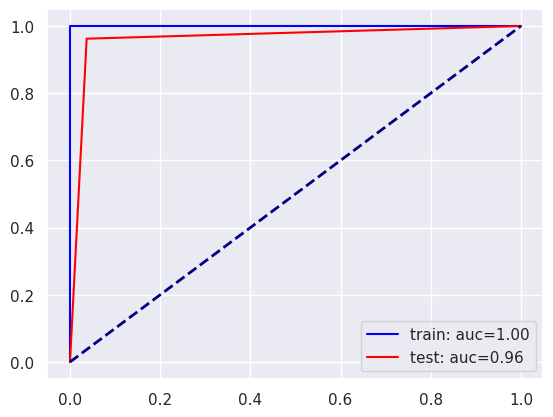

---------------------------------------------------------------------------------------
**** KNeighborsClassifier ****
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       944
           1       0.62      0.44      0.51       189

    accuracy                           0.86      1133
   macro avg       0.76      0.69      0.72      1133
weighted avg       0.85      0.86      0.85      1133


Confusion Matrix: 



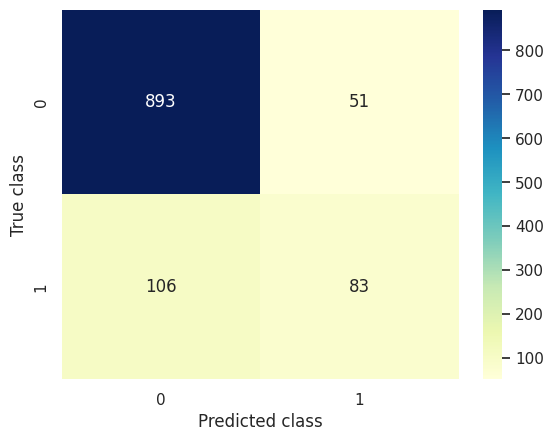

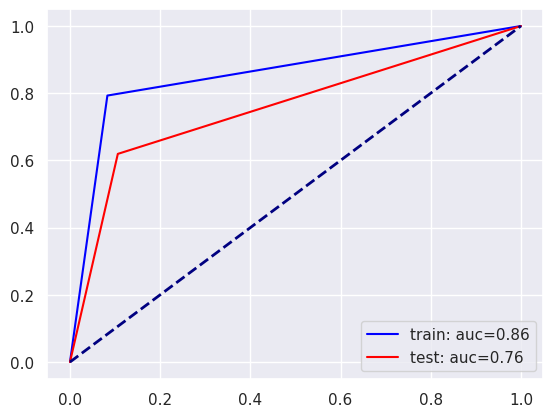

---------------------------------------------------------------------------------------
**** XGBoost Classifier ****
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       944
           1       0.90      0.90      0.90       189

    accuracy                           0.97      1133
   macro avg       0.94      0.94      0.94      1133
weighted avg       0.97      0.97      0.97      1133


Confusion Matrix: 



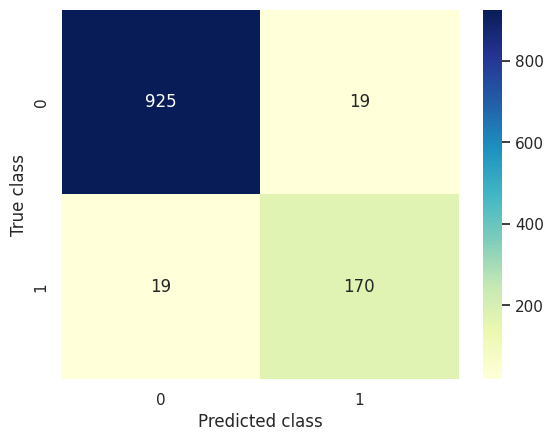

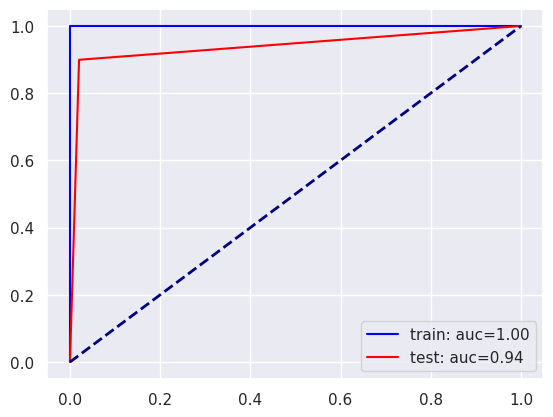

---------------------------------------------------------------------------------------


In [42]:
for name, model in models:
    fit_evaluate(model, X_train, X_test, y_train.values.ravel(), y_test.values.ravel(), name)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**** LogisticRegression ****
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       944
           1       0.58      0.68      0.62       189

    accuracy                           0.86      1133
   macro avg       0.75      0.79      0.77      1133
weighted avg       0.87      0.86      0.87      1133


Confusion Matrix: 



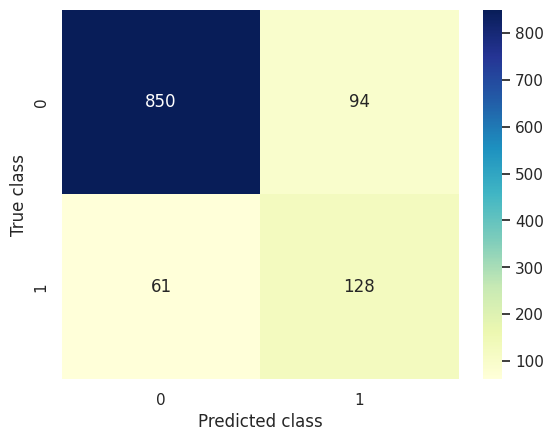

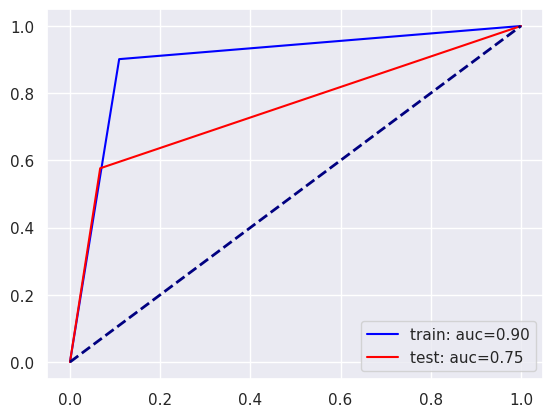

---------------------------------------------------------------------------------------
**** RandomForestClassifier ****
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       944
           1       0.92      0.78      0.85       189

    accuracy                           0.95      1133
   macro avg       0.94      0.88      0.91      1133
weighted avg       0.95      0.95      0.95      1133


Confusion Matrix: 



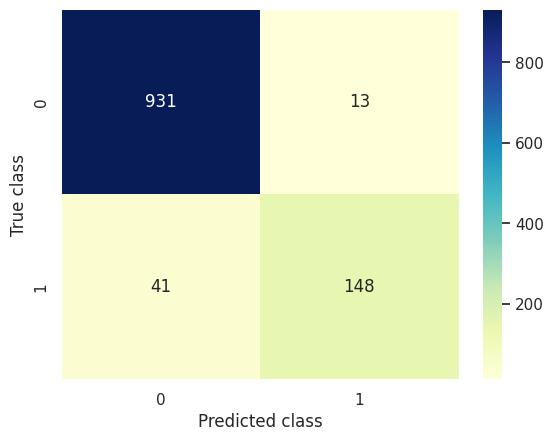

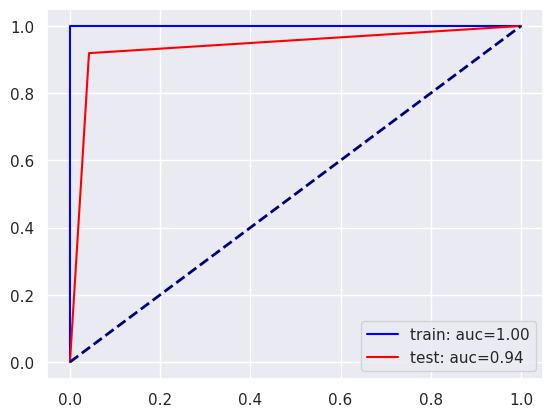

---------------------------------------------------------------------------------------
**** KNeighborsClassifier ****
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       944
           1       0.47      0.87      0.61       189

    accuracy                           0.82      1133
   macro avg       0.72      0.84      0.74      1133
weighted avg       0.89      0.82      0.83      1133


Confusion Matrix: 



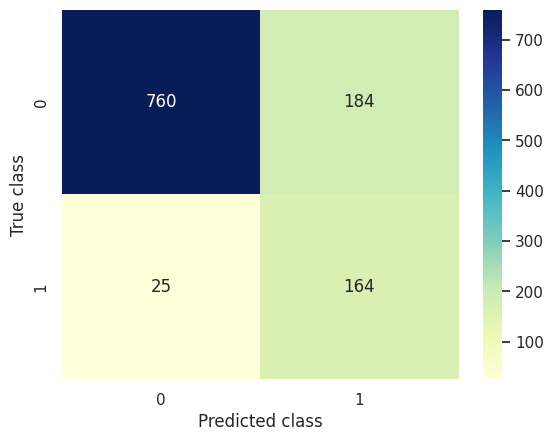

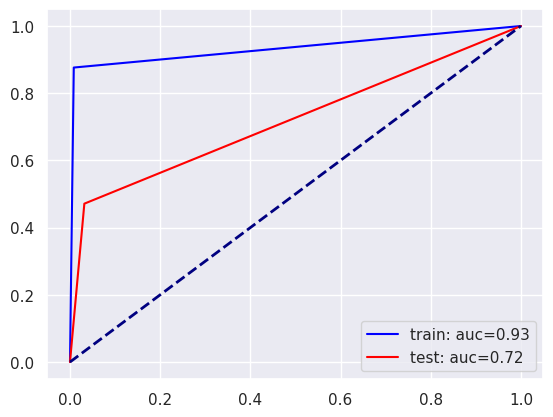

---------------------------------------------------------------------------------------
**** XGBoost Classifier ****
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       944
           1       0.89      0.84      0.86       189

    accuracy                           0.95      1133
   macro avg       0.93      0.91      0.92      1133
weighted avg       0.95      0.95      0.95      1133


Confusion Matrix: 



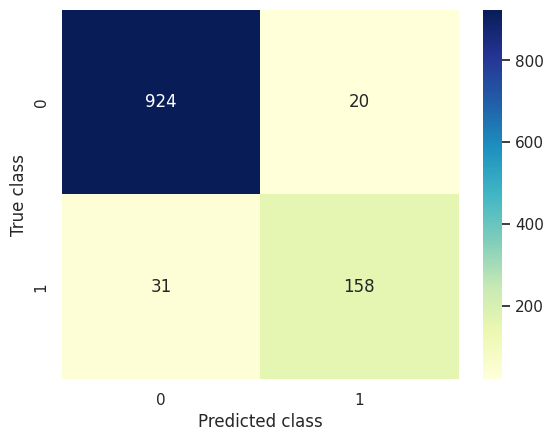

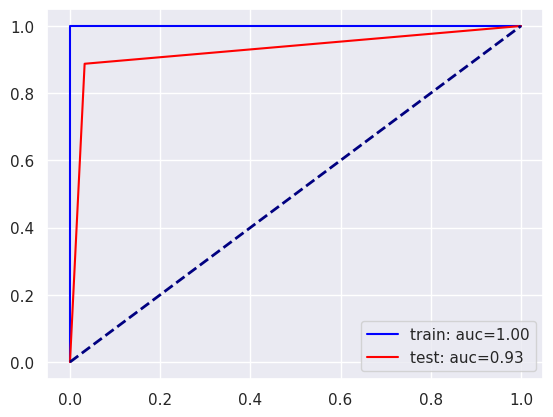

---------------------------------------------------------------------------------------


In [45]:
for name , model in models:
    fit_evaluate(model, X_train_SMOTE, X_test, y_train_SMOTE.values.ravel(), y_test.values.ravel(),name)